In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from collections import Counter

from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold,StratifiedKFold
 
from sklearn import tree
from sklearn import metrics

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, confusion_matrix

from imblearn.metrics import geometric_mean_score
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.over_sampling import KMeansSMOTE
from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.under_sampling import NearMiss
from imblearn.combine import SMOTEENN
from imblearn.combine import SMOTETomek


ds = pd.read_csv("D:/R/Pythonfile/Telecom Churn Data SingTel.csv")
ds.head()


,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,num_of _voice_mail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_international_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


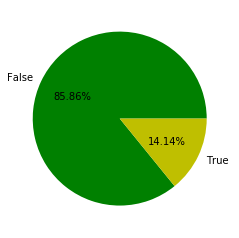

In [2]:
# pie chart indicates the ratio
plt.axes(aspect = 'equal')
counts = ds.churn.value_counts()


plt.pie(x = counts,
        labels=['False','True'], 
        autopct='%.2f%%', 
        colors=['g','y'])

plt.show()

In [3]:
# data cleaning
ds.drop(labels=['state','area_code','phone_number','voice_mail_plan'], axis = 1, inplace = True) 
#inplace：True:former dataframe is changed

ds.international_plan = ds.international_plan.map({'no':0,'yes':1})
#ds.voice_mail_plan = ds.voice_mail_plan.map({'no':0,'yes':1})
ds.churn = ds.churn.map({'False.':0,'True.':1})
#ds.head()
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 17 columns):
account_length                   5000 non-null int64
international_plan               5000 non-null int64
num_of _voice_mail_messages      5000 non-null int64
total_day_minutes                5000 non-null float64
total_day_calls                  5000 non-null int64
total_day_charge                 5000 non-null float64
total_eve_minutes                5000 non-null float64
total_eve_calls                  5000 non-null int64
total_eve_charge                 5000 non-null float64
total_night_minutes              5000 non-null float64
total_night_calls                5000 non-null int64
total_night_charge               5000 non-null float64
total_international_minutes      5000 non-null float64
total_intl_calls                 5000 non-null int64
total_intl_charge                5000 non-null float64
number_customer_service_calls    5000 non-null int64
churn                        

0    0.858
1    0.142
Name: churn, dtype: float64
0    0.856444
1    0.143556
Name: churn, dtype: float64
0    0.856444
1    0.143556
Name: churn, dtype: float64
0    0.861111
1    0.138889
Name: churn, dtype: float64
0    0.859556
1    0.140444
Name: churn, dtype: float64
0    0.862667
1    0.137333
Name: churn, dtype: float64
0    0.858
1    0.142
Name: churn, dtype: float64
0    0.856667
1    0.143333
Name: churn, dtype: float64
0    0.860222
1    0.139778
Name: churn, dtype: float64
0    0.856889
1    0.143111
Name: churn, dtype: float64
Modelprediction-Accuracy: 0.9198; Standard Deviation: 0.0132
Recall: 0.7437; Standard Deviation: 0.0499
F1-score: 0.7218; Standard Deviation: 0.0475
G-means: 0.8397; Standard Deviation: 0.0297


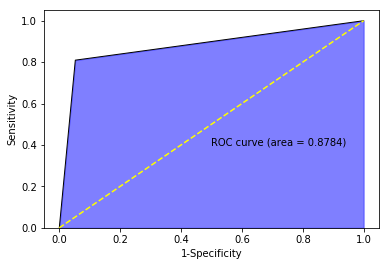

In [14]:
# divide into the training and test data sets.
tr = ds.columns[:-1]


#X_train,X_test,y_train,y_test = model_selection.train_test_split(ds[tr], ds.churn, test_size=0.25,random_state=67)

#benchmark
kf = KFold(n_splits=10,shuffle=False)

acc = []
rec = []
f1 = []
gm = []

for train, test in kf.split(ds[tr],ds.churn):
    
    
    X_train = ds[tr].loc[train] #Index data by row(column) labels or use ix()
    y_train = ds.churn.loc[train]    


    X_test = ds[tr].loc[test]
    y_test = ds.churn.loc[test]

    dt = tree.DecisionTreeClassifier() # n_estimators = 300
    dt.fit(X_train,y_train)
    pred = dt.predict(X_test)
    acc.append(metrics.accuracy_score(y_test, pred))
    rec.append(metrics.recall_score(y_test, pred))
    f1.append(metrics.f1_score(y_test, pred)) 
    gm.append(geometric_mean_score(y_test, pred))
    # The proportion of categories before resampling
    print(y_train.value_counts()/len(y_train))

print('Modelprediction-Accuracy: %.4f; Standard Deviation: %.4f' % (np.mean(acc), np.std(acc)))
print('Recall: %.4f; Standard Deviation: %.4f' % (np.mean(rec), np.std(rec)))
print('F1-score: %.4f; Standard Deviation: %.4f' % (np.mean(f1), np.std(f1)))
print('G-means: %.4f; Standard Deviation: %.4f' % (np.mean(gm), np.std(gm))) 

   

#results = cross_val_score(dt, tr, ds.churn, cv=kf)
#print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))


# evaluation report
#print(metrics.classification_report(y_test, pred))

# ROC
y_score = dt.predict_proba(np.array(X_test))[:,1]
fpr,tpr,threshold = metrics.roc_curve(y_test, y_score)

# AUC
rauc = metrics.auc(fpr,tpr)

plt.stackplot(fpr, tpr, color='blue', alpha = 0.5, edgecolor = 'black') # alpha : transparency
# add border line
plt.plot(fpr, tpr, color='black', lw = 1)
# add diagonal line
plt.plot([0,1],[0,1], color = 'yellow', linestyle = '--')
#add text information
plt.text(0.5,0.4,'ROC curve (area = %0.4f)' % rauc)

plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')

plt.show()


0    0.858
1    0.142
Name: churn, dtype: float64
After resampling:
1    0.500621
0    0.499379
Name: churn, dtype: float64
0    0.856444
1    0.143556
Name: churn, dtype: float64
After resampling:
1    0.500622
0    0.499378
Name: churn, dtype: float64
0    0.856444
1    0.143556
Name: churn, dtype: float64
After resampling:
1    0.50062
0    0.49938
Name: churn, dtype: float64
0    0.861111
1    0.138889
Name: churn, dtype: float64
After resampling:
1    0.500612
0    0.499388
Name: churn, dtype: float64
0    0.859556
1    0.140444
Name: churn, dtype: float64
After resampling:
1    0.500622
0    0.499378
Name: churn, dtype: float64
0    0.862667
1    0.137333
Name: churn, dtype: float64
After resampling:
1    0.500616
0    0.499384
Name: churn, dtype: float64
0    0.858
1    0.142
Name: churn, dtype: float64
After resampling:
1    0.500622
0    0.499378
Name: churn, dtype: float64
0    0.856667
1    0.143333
Name: churn, dtype: float64
After resampling:
1    0.500624
0    0.499376
Na

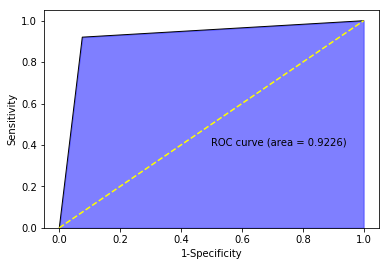

In [15]:
def Resamplelearning(clas, X,target):

    for train, test in kf.split(X,target): 
        X_train = X.loc[train]
        y_train = target.loc[train]    
        
        #OVERSAMPLING
        
        #SMOTE
        #osmo = SMOTE(random_state=67) 
        #osa_X,osa_y = osmo.fit_sample(X_train, y_train)

        
        #BorderlineSMOTE
        #obsmo = BorderlineSMOTE(random_state=67)
        #osa_X,osa_y = obsmo.fit_sample(X_train, y_train)
        
        
        #KMeansSMOTE
        #oksmo = KMeansSMOTE(random_state=67,cluster_balance_threshold=0.0,k_neighbors=5)
        #osa_X,osa_y = oksmo.fit_sample(X_train, y_train)
        
        
        
        #UNDERSAMPLING
        
        #TomekLinks
        #utl = TomekLinks() 
        #usa_X,usa_y = utl.fit_sample(X_train, y_train)
        
        
        #ENN
        #uenn = EditedNearestNeighbours() 
        #usa_X,usa_y = uenn.fit_sample(X_train, y_train)
         
            
        #NearMiss
        #unm = NearMiss(version=1) 
        #usa_X,usa_y = unm.fit_sample(X_train, y_train)
        
        
        
        #Hybrid sampling
        
        #SMOTEENN
        #hse = SMOTEENN(random_state=67) 
        #hsa_X,hsa_y = hse.fit_sample(X_train, y_train)
        
        
        #SMOTETomek
        #hst = SMOTETomek(random_state=67) 
        #hsa_X,hsa_y = hst.fit_sample(X_train, y_train)
        
        
        #Tomek-KSMOTE
        #utl = TomekLinks() 
        #usa_X,usa_y = utl.fit_sample(X_train, y_train)
        #oksmo = KMeansSMOTE(random_state=67, cluster_balance_threshold=0.0, k_neighbors=5)
        #hsa_X,hsa_y = oksmo.fit_sample(usa_X,usa_y)
        
        
        #KSMOTE-Tomek
        #oksmo = KMeansSMOTE(random_state=67, cluster_balance_threshold=0.0, k_neighbors=5)
        #osa_X,osa_y = oksmo.fit_sample(X_train, y_train)
        #utl = TomekLinks() 
        #hsa_X,hsa_y = utl.fit_sample(osa_X,osa_y)
        
        
        #ENN-KSMOTE
        utl = EditedNearestNeighbours() 
        usa_X,usa_y = utl.fit_sample(X_train, y_train)
        oksmo = KMeansSMOTE(random_state=67, cluster_balance_threshold=0.0, k_neighbors=5)
        hsa_X,hsa_y = oksmo.fit_sample(usa_X,usa_y)
        
        # The proportion of categories before resampling
        print(y_train.value_counts()/len(y_train))
        # The proportion of categories after resampling
        print('After resampling:')
        #print(pd.Series(osa_y).value_counts()/len(osa_y))
        #print(pd.Series(usa_y).value_counts()/len(usa_y))
        print(pd.Series(hsa_y).value_counts()/len(hsa_y))
        
        
        X_test = X.loc[test]
        y_test = target.loc[test]

        #accuracy of model prediction and other metrics
        #clas.fit(osa_X,osa_y) # oversampling 
        #clas.fit(usa_X,usa_y) # undersampling 
        clas.fit(hsa_X,hsa_y) # hybridsampling 
        pred = clas.predict(X_test)
        acc.append(metrics.accuracy_score(y_test, pred))
        rec.append(metrics.recall_score(y_test, pred))
        f1.append(metrics.f1_score(y_test, pred)) 
        gm.append(geometric_mean_score(y_test, pred))
    print('Modelprediction-Accuracy: %.4f; Standard Deviation: %.4f' % (np.mean(acc), np.std(acc)))
    print('Recall: %.4f; Standard Deviation: %.4f' % (np.mean(rec), np.std(rec)))
    print('F1-score: %.4f; Standard Deviation: %.4f' % (np.mean(f1), np.std(f1)))
    print('G-means: %.4f; Standard Deviation: %.4f' % (np.mean(gm), np.std(gm))) 
    
    # ROC
    y_score = clas.predict_proba(np.array(X_test))[:,1]
    fpr,tpr,threshold = metrics.roc_curve(y_test, y_score)

    # AUC
    rauc = metrics.auc(fpr,tpr)

    plt.stackplot(fpr, tpr, color='blue', alpha = 0.5, edgecolor = 'black') # alpha : transparency
    # add border line
    plt.plot(fpr, tpr, color='black', lw = 1)
    # add diagonal line
    plt.plot([0,1],[0,1], color = 'yellow', linestyle = '--')
    #add text information
    plt.text(0.5,0.4,'ROC curve (area = %0.4f)' % rauc)

    plt.xlabel('1-Specificity')
    plt.ylabel('Sensitivity')

    plt.show()

#DecisionTreeClassifier
Resamplelearning(tree.DecisionTreeClassifier(), ds[tr],ds.churn)


0    0.858
1    0.142
Name: churn, dtype: float64
After resampling:
1    0.500621
0    0.499379
Name: churn, dtype: float64
0    0.856444
1    0.143556
Name: churn, dtype: float64
After resampling:
1    0.500622
0    0.499378
Name: churn, dtype: float64
0    0.856444
1    0.143556
Name: churn, dtype: float64
After resampling:
1    0.50062
0    0.49938
Name: churn, dtype: float64
0    0.861111
1    0.138889
Name: churn, dtype: float64
After resampling:
1    0.500612
0    0.499388
Name: churn, dtype: float64
0    0.859556
1    0.140444
Name: churn, dtype: float64
After resampling:
1    0.500622
0    0.499378
Name: churn, dtype: float64
0    0.862667
1    0.137333
Name: churn, dtype: float64
After resampling:
1    0.500616
0    0.499384
Name: churn, dtype: float64
0    0.858
1    0.142
Name: churn, dtype: float64
After resampling:
1    0.500622
0    0.499378
Name: churn, dtype: float64
0    0.856667
1    0.143333
Name: churn, dtype: float64
After resampling:
1    0.500624
0    0.499376
Na

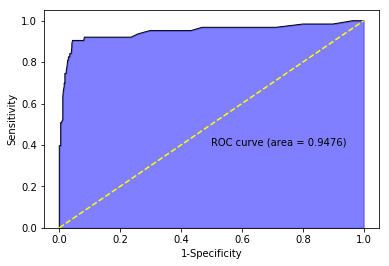

In [16]:
#RandomForestClassifier
Resamplelearning(RandomForestClassifier(random_state = 67), ds[tr],ds.churn)

0    0.858
1    0.142
Name: churn, dtype: float64
After resampling:
1    0.500621
0    0.499379
Name: churn, dtype: float64
0    0.856444
1    0.143556
Name: churn, dtype: float64
After resampling:
1    0.500622
0    0.499378
Name: churn, dtype: float64
0    0.856444
1    0.143556
Name: churn, dtype: float64
After resampling:
1    0.50062
0    0.49938
Name: churn, dtype: float64
0    0.861111
1    0.138889
Name: churn, dtype: float64
After resampling:
1    0.500612
0    0.499388
Name: churn, dtype: float64
0    0.859556
1    0.140444
Name: churn, dtype: float64
After resampling:
1    0.500622
0    0.499378
Name: churn, dtype: float64
0    0.862667
1    0.137333
Name: churn, dtype: float64
After resampling:
1    0.500616
0    0.499384
Name: churn, dtype: float64
0    0.858
1    0.142
Name: churn, dtype: float64
After resampling:
1    0.500622
0    0.499378
Name: churn, dtype: float64
0    0.856667
1    0.143333
Name: churn, dtype: float64
After resampling:
1    0.500624
0    0.499376
Na

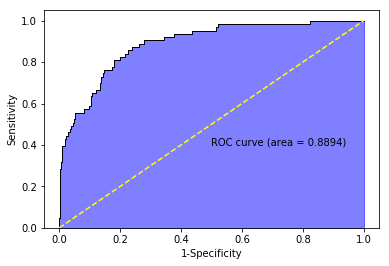

In [17]:
#AdaBoostClassifier
Resamplelearning(AdaBoostClassifier(random_state = 67), ds[tr],ds.churn)

0    0.858
1    0.142
Name: churn, dtype: float64
After resampling:
1    0.500621
0    0.499379
Name: churn, dtype: float64
0    0.856444
1    0.143556
Name: churn, dtype: float64
After resampling:
1    0.500622
0    0.499378
Name: churn, dtype: float64
0    0.856444
1    0.143556
Name: churn, dtype: float64
After resampling:
1    0.50062
0    0.49938
Name: churn, dtype: float64
0    0.861111
1    0.138889
Name: churn, dtype: float64
After resampling:
1    0.500612
0    0.499388
Name: churn, dtype: float64
0    0.859556
1    0.140444
Name: churn, dtype: float64
After resampling:
1    0.500622
0    0.499378
Name: churn, dtype: float64
0    0.862667
1    0.137333
Name: churn, dtype: float64
After resampling:
1    0.500616
0    0.499384
Name: churn, dtype: float64
0    0.858
1    0.142
Name: churn, dtype: float64
After resampling:
1    0.500622
0    0.499378
Name: churn, dtype: float64
0    0.856667
1    0.143333
Name: churn, dtype: float64
After resampling:
1    0.500624
0    0.499376
Na

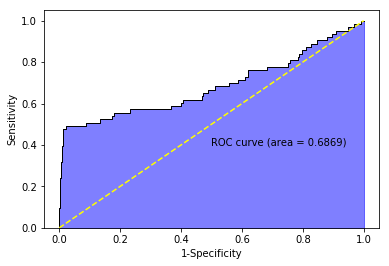

In [18]:
#SVM
Resamplelearning(svm.SVC(probability=True,random_state = 67), ds[tr],ds.churn)